In [1]:
from os import environ as ENV
DATA = ENV['PWD'] + '/../data/'

In [2]:
from multiprocessing import Pool, cpu_count
from collections import Counter

from tqdm.notebook import tqdm
import pandas as pd
import qbraid
from mitiq import ddd
# missing required dependency ply when installing mitiq

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
circuits_df = {
    k: pd.read_excel(DATA + f'circuits_{k}.xlsx', index_col=0)
    for k in [
        'ang', 'amp', 'amp-qft', 'ang-qft'
    ]
}

{k:v.shape for k,v in circuits_df.items()}

{'ang': (2926, 3),
 'amp': (2926, 3),
 'amp-qft': (2926, 3),
 'ang-qft': (2926, 3)}

In [4]:
circuits = {
    k: [qbraid.transpile(c, 'qiskit') for c in tqdm(v['qasm2'])]
    for k,v in circuits_df.items()
}

  0%|          | 0/2926 [00:00<?, ?it/s]

/home/user/work/quadrigems/mitigation/.venv/lib/python3.11/site-packages/qbraid/_entrypoints.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


  0%|          | 0/2926 [00:00<?, ?it/s]

  0%|          | 0/2926 [00:00<?, ?it/s]

  0%|          | 0/2926 [00:00<?, ?it/s]

In [5]:
def plot_gate_ratio(c):
    counts = Counter(g.operation.name for g in c)
    ax = plt.figure().add_subplot()
    ax.pie(x=counts.values(), labels=counts.keys())

def plot_gate_types(c):
    counts = Counter(g.operation.name for g in c)
    # counts = {'x': counts['x'], 'y': counts['y'], 'i': counts['id']}
    sns.barplot(counts)

┌─────────────┐     ┌───┐                                                                ┌─┐                        
 q_0: ┤ Rx(0.24448) ├──■──┤ H ├────────────────────────────────────────────────────────────────┤M├────────────────────────
      ├─────────────┤  │  └───┘┌───┐                                                           └╥┘┌─┐                     
 q_1: ┤ Rx(0.23833) ├──┼────■──┤ H ├────────────────────────────────────────────────────────────╫─┤M├─────────────────────
      ├─────────────┤  │    │  └───┘┌───┐                                                       ║ └╥┘┌─┐                  
 q_2: ┤ Rx(0.41681) ├──┼────┼────■──┤ H ├───────────────────────────────────────────────────────╫──╫─┤M├──────────────────
      ├─────────────┤  │    │    │  └───┘┌───┐                                                  ║  ║ └╥┘┌─┐               
 q_3: ┤ Rx(0.46775) ├──┼────┼────┼────■──┤ H ├──────────────────────────────────────────────────╫──╫──╫─┤M├───────────────
      ├─────────────┤  │    │    │    │  └───┘┌───┐                                             ║  ║  ║ └╥┘┌─┐            
 q_4: ┤ Rx(0.54879) ├──┼────┼────┼────┼────■──┤ H ├─────────────────────────────────────────────╫──╫──╫──╫─┤M├────────────
      ├─────────────┤  │    │    │    │    │  └───┘┌───┐                                        ║  ║  ║  ║ └╥┘┌─┐         
 q_5: ┤ Rx(0.34168) ├──┼────┼────┼────┼────┼────■──┤ H ├────────────────────────────────────────╫──╫──╫──╫──╫─┤M├─────────
      ├─────────────┤  │    │    │    │    │    │  └───┘┌───┐                                   ║  ║  ║  ║  ║ └╥┘┌─┐      
 q_6: ┤ Rx(0.30829) ├──┼────┼────┼────┼────┼────┼────■──┤ H ├───────────────────────────────────╫──╫──╫──╫──╫──╫─┤M├──────
      ├─────────────┤  │    │    │    │    │    │    │  └───┘┌───┐                              ║  ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_7: ┤ Rx(0.27695) ├──┼────┼────┼────┼────┼────┼────┼────■──┤ H ├──────────────────────────────╫──╫──╫──╫──╫──╫──╫─┤M├───
      └┬────────────┤  │    │    │    │    │    │    │    │  └───┘┌───┐                         ║  ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_8: ─┤ Rx(0.2985) ├──┼────┼────┼────┼────┼────┼────┼────┼────■──┤ H ├─────────────────────────╫──╫──╫──╫──╫──╫──╫──╫─┤M├
      ┌┴────────────┤┌─┴─┐  │    │    │    │    │    │    │    │  └┬─┬┘                         ║  ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_9: ┤ Rx(0.22947) ├┤ X ├──┼────┼────┼────┼────┼────┼────┼────┼───┤M├──────────────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      ├─────────────┤└───┘┌─┴─┐  │    │    │    │    │    │    │   └╥┘ ┌─┐                      ║  ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ┤ Rx(0.24176) ├─────┤ X ├──┼────┼────┼────┼────┼────┼────┼────╫──┤M├──────────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      └┬────────────┤     └───┘┌─┴─┐  │    │    │    │    │    │    ║  └╥┘┌─┐                   ║  ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─┤ Rx(0.5843) ├──────────┤ X ├──┼────┼────┼────┼────┼────┼────╫───╫─┤M├───────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      ┌┴────────────┤          └───┘┌─┴─┐  │    │    │    │    │    ║   ║ └╥┘┌─┐                ║  ║  ║  ║  ║  ║  ║  ║  ║ 
q_12: ┤ Rx(0.45805) ├───────────────┤ X ├──┼────┼────┼────┼────┼────╫───╫──╫─┤M├────────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      ├─────────────┤               └───┘┌─┴─┐  │    │    │    │    ║   ║  ║ └╥┘┌─┐             ║  ║  ║  ║  ║  ║  ║  ║  ║ 
q_13: ┤ Rx(0.34612) ├────────────────────┤ X ├──┼────┼────┼────┼────╫───╫──╫──╫─┤M├─────────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      ├─────────────┤                    └───┘┌─┴─┐  │    │    │    ║   ║  ║  ║ └╥┘┌─┐          ║  ║  ║  ║  ║  ║  ║  ║  ║ 
q_14: ┤ Rx(0.30202) ├─────────────────────────┤ X ├──┼────┼────┼────╫───╫──╫──╫──╫─┤M├──────────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      ├─────────────┤                         └───┘┌─┴─┐  │    │    ║   ║  ║  ║  ║ └╥┘┌─┐       ║  ║  ║  ║  ║  ║  ║  ║  ║ 
q_15: ┤ Rx(0.28469) ├──────────────────────────────┤ X ├──┼────┼────╫───╫──╫──╫──╫──╫─┤M├───────╫──╫──╫──╫──╫──╫──╫──╫──╫─
      ├─────────────┤                              └───┘┌─┴─┐  │    ║ 

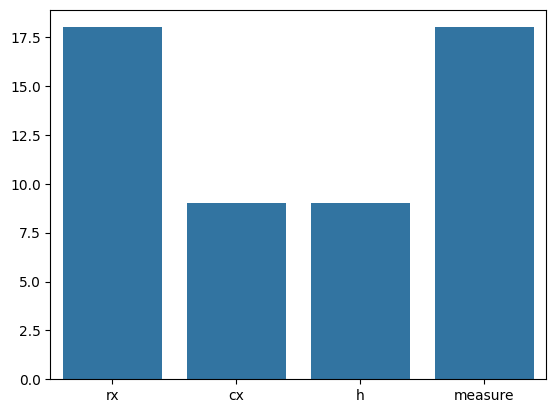

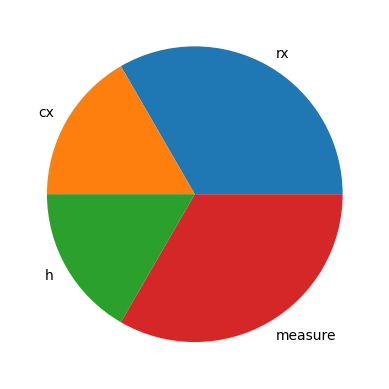

In [6]:
# ang_ddd(xyxyx) test
c = ddd.insert_ddd_sequences(circuit=circuits['ang'][981], rule=ddd.rules.xyxy)
plot_gate_types(c), plot_gate_ratio(c)
c.draw(fold=-1)

┌───┐┌────────────┐                                                                                                 ┌───┐     ┌───┐      ┌───┐      ┌───┐      ┌───┐     ┌───┐                     ┌───┐      ┌───┐     ┌───┐      ┌───┐     ┌───┐          ┌───┐          ┌───┐                         ┌───┐┌────────────┐                                                                                                 ┌───┐     ┌───┐      ┌───┐      ┌───┐      ┌───┐     ┌───┐                     ┌───┐      ┌───┐     ┌───┐      ┌───┐     ┌───┐      ┌───┐     ┌───┐                                ┌───┐      ┌───┐     ┌───┐     ┌───┐     ┌───┐      ┌───┐      ┌───┐                     ┌───┐      ┌───┐      ┌───┐      ┌───┐     ┌───┐     ┌───┐                                                                                                                         ┌─────────────┐┌───┐                ┌───┐      ┌───┐     ┌───┐     ┌───┐     ┌───┐      ┌───┐      ┌───┐                     ┌───┐      ┌───┐      ┌───┐      ┌───┐     ┌───┐     ┌───┐                                                                                                                         ┌─────────────┐┌───┐┌─┐      
q_0: ┤ H ├┤ Ry(1.4733) ├──■───────────────────■─────────────────────────■─────────────────────────────────────────────■──┤ I ├─────┤ X ├──────┤ Y ├──────┤ X ├──────┤ Y ├─────┤ I ├─────────────■───────┤ I ├──────┤ I ├─────┤ X ├──────┤ Y ├─────┤ X ├──────────┤ Y ├──────────┤ I ├──────────────────────■──┤ H ├┤ Ry(1.4733) ├──■───────────────────■─────────────────────────■─────────────────────────────────────────────■──┤ I ├─────┤ X ├──────┤ Y ├──────┤ X ├──────┤ Y ├─────┤ I ├─────────────■───────┤ I ├──────┤ I ├─────┤ X ├──────┤ Y ├─────┤ X ├──────┤ Y ├─────┤ I ├─────────────■─────────■────────┤ I ├──────┤ I ├─────┤ X ├─────┤ Y ├─────┤ X ├──────┤ Y ├──────┤ I ├─────────────■───────┤ I ├──────┤ X ├──────┤ Y ├──────┤ X ├─────┤ Y ├─────┤ I ├────────────────■───────────────────────────────────────────■─────────────────────────────■───────────────────────────■──┤ Ry(-2.1324) ├┤ H ├───────■────────┤ I ├──────┤ I ├─────┤ X ├─────┤ Y ├─────┤ X ├──────┤ Y ├──────┤ I ├─────────────■───────┤ I ├──────┤ X ├──────┤ Y ├──────┤ X ├─────┤ Y ├─────┤ I ├────────────────■───────────────────────────────────────────■─────────────────────────────■───────────────────────────■──┤ Ry(-2.1324) ├┤ H ├┤M├──────
     ├───┤├────────────┤┌─┴─┐┌─────────────┐┌─┴─┐                       │                           ┌───┐      ┌───┐  │  ├───┤     ├───┤      └───┘      ├───┤      ├───┤     ├───┤      ┌───┐  │       ├───┤      ├───┤     ├───┤      └───┘     ├───┤      ┌───┴───┴────┐     ├───┤          ┌───┐       │  ├───┤└───┬───┬────┘┌─┴─┐┌─────────────┐┌─┴─┐                       │                           ┌───┐      ┌───┐  │  ├───┤     ├───┤      └───┘      ├───┤      ├───┤     ├───┤      ┌───┐  │       ├───┤      ├───┤     ├───┤      └───┘     ├───┤      ├───┤     ├───┤      ┌───┐  │  ┌───┐  │        ├───┤      ├───┤     ├───┤     └───┘     ├───┤      ├───┤      ├───┤      ┌───┐  │       ├───┤      ├───┤      ├───┤      └───┘     ├───┤     ├───┤    ┌───┐       │        ┌───┐                              │                           ┌─┴─┐     ┌────────────────┐┌─┴─┐├─────────────┤├───┤┌───┐  │        ├───┤      ├───┤     ├───┤     └───┘     ├───┤      ├───┤      ├───┤      ┌───┐  │       ├───┤      ├───┤      ├───┤      └───┘     ├───┤     ├───┤    ┌───┐       │        ┌───┐                              │                           ┌─┴─┐     ┌────────────────┐┌─┴─┐├─────────────┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ Ry(1.7653) ├┤ X ├┤ Ry(0.18643) ├┤ X ├──■────────────────────┼───────────────────■───────┤ X ├──────┤ Y ├──┼──┤ X ├─────┤ Y ├────────■────────┤ I ├──────┤ I ├─────┤ X ├──────┤ Y ├──┼───────┤ X ├──────┤ Y ├─────┤ I ├────────■───────┤ H ├──────┤ Ry(1.7653) ├─────┤ X ├──────────┤ Y ├───────┼──┤ X ├────┤ Y ├─────┤ X ├┤ Ry(0.18643) ├┤ X ├──■────────────────────┼───────────────────■───────┤ X ├──────

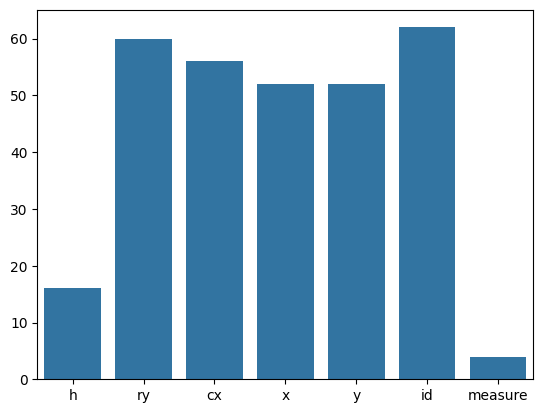

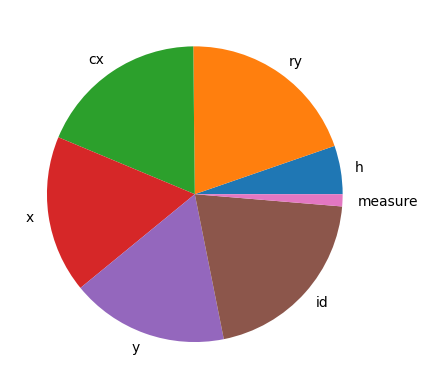

In [7]:
# amp_ddd(xyxy) test
c = ddd.construct_circuits(circuit=circuits['amp'][0], rule=ddd.rules.xyxy)[0]
plot_gate_types(c), plot_gate_ratio(c)
c.draw(fold=-1)

┌───┐┌────────────┐                         ┌───┐     ┌───┐                     ┌───┐     ┌───┐     ┌───┐                ┌───┐     ┌───┐      ┌───┐┌───┐      ┌───┐      ┌───┐                               ┌───┐      ┌───┐     ┌───┐      ┌───┐┌───┐     ┌───┐      ┌───┐                               ┌───┐      ┌───┐┌──────────────┐┌───┐┌─────────────┐     ┌───┐┌───────────────┐     ┌───┐┌─────────────┐     ┌───┐┌────────────────┐     ┌───┐┌──────────────┐┌───┐┌───┐      ┌───┐      ┌───┐┌───┐     ┌───┐     ┌───┐     ┌───┐                                ┌───┐┌────────────┐                         ┌───┐     ┌───┐                     ┌───┐     ┌───┐     ┌───┐                ┌───┐     ┌───┐      ┌───┐┌───┐      ┌───┐      ┌───┐                               ┌───┐      ┌───┐     ┌───┐      ┌───┐┌───┐     ┌───┐      ┌───┐                                          ┌───┐      ┌───┐     ┌───┐     ┌───┐┌───┐     ┌───┐      ┌───┐                                ┌───┐      ┌───┐      ┌───┐      ┌───┐┌───┐     ┌───┐                                   ┌───┐      ┌───┐      ┌───┐                     ┌───┐      ┌───┐                                     ┌─────────────┐┌───┐      ┌───┐     ┌───┐      ┌───┐     ┌───┐     ┌───┐      ┌───┐      ┌───┐┌───┐     ┌───┐      ┌───┐                            ┌───┐┌──────────────┐     ┌───┐┌────────────────┐     ┌───┐┌─────────────┐      ┌───┐┌───────────────┐┌───┐┌─────────────┐┌───┐┌──────────────┐┌───┐                ┌───┐      ┌───┐     ┌───┐     ┌───┐┌───┐     ┌───┐      ┌───┐                                ┌───┐      ┌───┐      ┌───┐      ┌───┐┌───┐     ┌───┐                                   ┌───┐      ┌───┐      ┌───┐                     ┌───┐      ┌───┐                                     ┌─────────────┐┌───┐┌─┐      
q_0: ┤ H ├┤ Ry(1.4733) ├──■───────────────────■──┤ X ├─────┤ X ├─────────────■───────┤ I ├─────┤ X ├─────┤ X ├─────────────■──┤ I ├─────┤ I ├──────┤ X ├┤ I ├──────┤ X ├──────┤ I ├───────────────────────■───────┤ I ├──────┤ I ├─────┤ X ├──────┤ I ├┤ X ├─────┤ I ├──────┤ I ├───────────────────────■───────┤ H ├──────┤ X ├┤ U3(0,0,7π/4) ├┤ X ├┤ U3(0,0,π/4) ├─────┤ X ├┤ U3(0,0,15π/8) ├─────┤ X ├┤ U3(0,0,π/8) ├─────┤ X ├┤ U3(0,0,6.0868) ├─────┤ X ├┤ U3(0,0,π/16) ├┤ I ├┤ I ├──────┤ X ├──────┤ I ├┤ I ├─────┤ X ├─────┤ I ├─────┤ I ├──────────────────────────────X─┤ H ├┤ Ry(1.4733) ├──■───────────────────■──┤ X ├─────┤ X ├─────────────■───────┤ I ├─────┤ X ├─────┤ X ├─────────────■──┤ I ├─────┤ I ├──────┤ X ├┤ I ├──────┤ X ├──────┤ I ├───────────────────────■───────┤ I ├──────┤ I ├─────┤ X ├──────┤ I ├┤ X ├─────┤ I ├──────┤ I ├───────────────────────■─────────■────────┤ I ├──────┤ I ├─────┤ X ├─────┤ I ├┤ X ├─────┤ I ├──────┤ I ├────────────────────────■───────┤ I ├──────┤ I ├──────┤ X ├──────┤ I ├┤ X ├─────┤ I ├──────────────────────────■────────┤ I ├──────┤ X ├──────┤ X ├─────────────■───────┤ X ├──────┤ X ├──────■───────────────────────────■──┤ Ry(-2.1324) ├┤ H ├────X─┤ I ├─────┤ I ├──────┤ I ├─────┤ X ├─────┤ I ├──────┤ I ├──────┤ X ├┤ I ├─────┤ I ├──────┤ I ├────────────────────────────┤ X ├┤ U3(0,0,π/16) ├─────┤ X ├┤ U3(0,0,6.0868) ├─────┤ X ├┤ U3(0,0,π/8) ├──────┤ X ├┤ U3(0,0,15π/8) ├┤ X ├┤ U3(0,0,π/4) ├┤ X ├┤ U3(0,0,7π/4) ├┤ H ├───────■────────┤ I ├──────┤ I ├─────┤ X ├─────┤ I ├┤ X ├─────┤ I ├──────┤ I ├────────────────────────■───────┤ I ├──────┤ I ├──────┤ X ├──────┤ I ├┤ X ├─────┤ I ├──────────────────────────■────────┤ I ├──────┤ X ├──────┤ X ├─────────────■───────┤ X ├──────┤ X ├──────■───────────────────────────■──┤ Ry(-2.1324) ├┤ H ├┤M├──────
     ├───┤├────────────┤┌─┴─┐┌─────────────┐┌─┴─┐└───┘     ├───┤      ┌───┐  │       ├───┤     └───┘     ├───┤      ┌───┐  │  ├───┤     ├───┤      └───┘└───┘      ├───┤      ├───┤     ┌───┐      ┌───┐  │       ├───┤      ├───┤     ├───┤      └───┘└───┘┌────┴───┴────┐ ├───┤     ┌───┐      ┌───┐  │       ├───┤      └─┬─┘└──────────────┘└─┬─┘└────┬───┬────┘┌───┐└─┬─┘└─────┬───┬─────┘┌───┐└─┬─┘└────┬───┬────┘┌───┐└─┬─┘└┬──────────────┬┘┌───┐└─┬─┘├

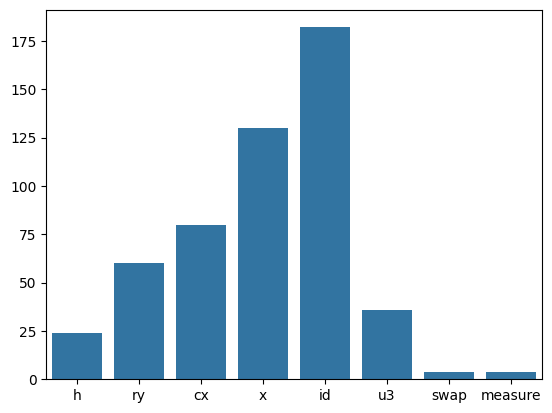

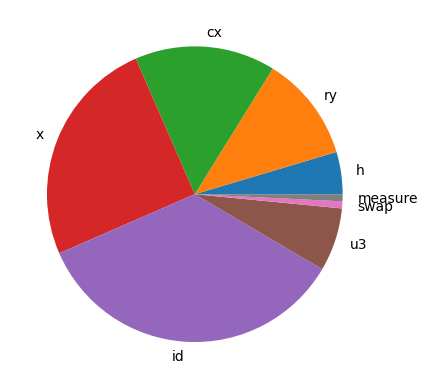

In [8]:
# amp_qft_ddd(xx) test
c = ddd.construct_circuits(circuit=circuits['amp-qft'][0], rule=ddd.rules.xx)[0]
plot_gate_types(c), plot_gate_ratio(c)
c.draw(fold=-1)

┌───┐┌────────────┐                         ┌───┐     ┌───┐                     ┌───┐     ┌───┐     ┌───┐                ┌───┐     ┌───┐      ┌───┐┌───┐      ┌───┐      ┌───┐                               ┌───┐      ┌───┐     ┌───┐      ┌───┐┌───┐     ┌───┐          ┌───┐                                        ┌───┐┌────────────┐                         ┌───┐     ┌───┐                     ┌───┐     ┌───┐     ┌───┐                ┌───┐     ┌───┐      ┌───┐┌───┐      ┌───┐      ┌───┐                               ┌───┐      ┌───┐     ┌───┐      ┌───┐┌───┐     ┌───┐      ┌───┐                                          ┌───┐      ┌───┐     ┌───┐     ┌───┐┌───┐     ┌───┐      ┌───┐                                ┌───┐      ┌───┐      ┌───┐      ┌───┐┌───┐     ┌───┐                                   ┌───┐      ┌───┐      ┌───┐                     ┌───┐      ┌───┐                                     ┌─────────────┐┌───┐                ┌───┐      ┌───┐     ┌───┐     ┌───┐┌───┐     ┌───┐      ┌───┐                                ┌───┐      ┌───┐      ┌───┐      ┌───┐┌───┐     ┌───┐                                   ┌───┐      ┌───┐      ┌───┐                     ┌───┐      ┌───┐                                     ┌─────────────┐┌───┐┌─┐      
q_0: ┤ H ├┤ Ry(1.4733) ├──■───────────────────■──┤ Y ├─────┤ Y ├─────────────■───────┤ I ├─────┤ Y ├─────┤ Y ├─────────────■──┤ I ├─────┤ I ├──────┤ Y ├┤ I ├──────┤ Y ├──────┤ I ├───────────────────────■───────┤ I ├──────┤ I ├─────┤ Y ├──────┤ I ├┤ Y ├─────┤ I ├──────────┤ I ├─────────────────────────────────────■──┤ H ├┤ Ry(1.4733) ├──■───────────────────■──┤ Y ├─────┤ Y ├─────────────■───────┤ I ├─────┤ Y ├─────┤ Y ├─────────────■──┤ I ├─────┤ I ├──────┤ Y ├┤ I ├──────┤ Y ├──────┤ I ├───────────────────────■───────┤ I ├──────┤ I ├─────┤ Y ├──────┤ I ├┤ Y ├─────┤ I ├──────┤ I ├───────────────────────■─────────■────────┤ I ├──────┤ I ├─────┤ Y ├─────┤ I ├┤ Y ├─────┤ I ├──────┤ I ├────────────────────────■───────┤ I ├──────┤ I ├──────┤ Y ├──────┤ I ├┤ Y ├─────┤ I ├──────────────────────────■────────┤ I ├──────┤ Y ├──────┤ Y ├─────────────■───────┤ Y ├──────┤ Y ├──────■───────────────────────────■──┤ Ry(-2.1324) ├┤ H ├───────■────────┤ I ├──────┤ I ├─────┤ Y ├─────┤ I ├┤ Y ├─────┤ I ├──────┤ I ├────────────────────────■───────┤ I ├──────┤ I ├──────┤ Y ├──────┤ I ├┤ Y ├─────┤ I ├──────────────────────────■────────┤ I ├──────┤ Y ├──────┤ Y ├─────────────■───────┤ Y ├──────┤ Y ├──────■───────────────────────────■──┤ Ry(-2.1324) ├┤ H ├┤M├──────
     ├───┤├────────────┤┌─┴─┐┌─────────────┐┌─┴─┐└───┘     ├───┤      ┌───┐  │       ├───┤     └───┘     ├───┤      ┌───┐  │  ├───┤     ├───┤      └───┘└───┘      ├───┤      ├───┤     ┌───┐      ┌───┐  │       ├───┤      ├───┤     ├───┤      └───┘└───┘     ├───┤      ┌───┴───┴────┐     ┌───┐          ┌───┐       │  ├───┤└───┬───┬────┘┌─┴─┐┌─────────────┐┌─┴─┐└───┘     ├───┤      ┌───┐  │       ├───┤     └───┘     ├───┤      ┌───┐  │  ├───┤     ├───┤      └───┘└───┘      ├───┤      ├───┤     ┌───┐      ┌───┐  │       ├───┤      ├───┤     ├───┤      └───┘└───┘     ├───┤      ├───┤     ┌───┐      ┌───┐  │  ┌───┐  │        ├───┤      ├───┤     ├───┤     └───┘└───┘     ├───┤      ├───┤      ┌───┐      ┌───┐  │       ├───┤      ├───┤      ├───┤      └───┘└───┘     ├───┤     ┌───┐    ┌───┐       │        ├───┤      └───┘      ├───┤      ┌───┐  │       ├───┤      └───┘    ┌─┴─┐     ┌────────────────┐┌─┴─┐├─────────────┤├───┤┌───┐  │        ├───┤      ├───┤     ├───┤     └───┘└───┘     ├───┤      ├───┤      ┌───┐      ┌───┐  │       ├───┤      ├───┤      ├───┤      └───┘└───┘     ├───┤     ┌───┐    ┌───┐       │        ├───┤      └───┘      ├───┤      ┌───┐  │       ├───┤      └───┘    ┌─┴─┐     ┌────────────────┐┌─┴─┐├─────────────┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ Ry(1.7653) ├┤ X ├┤ Ry(0.18643) ├┤ X ├──■───────┤ I ├──────┤ Y ├──┼───────┤ Y ├───────■───────┤ I ├──────┤ Y ├──┼──┤ Y ├─────┤ I ├─────────────■────────┤ I ├──────┤ I ├─────┤ Y ├──────┤ I ├──┼───────┤ Y ├──────┤ I ├──

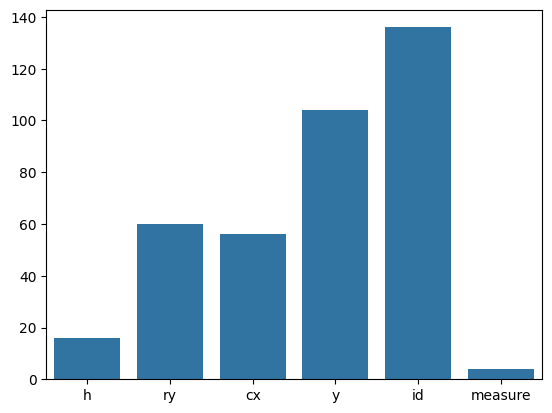

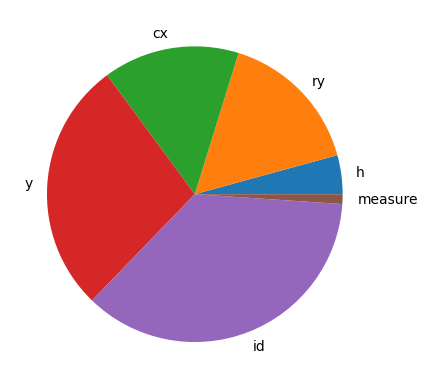

In [9]:
# amp_ddd(yy) test
c = ddd.construct_circuits(circuit=circuits['amp'][0], rule=ddd.rules.yy)[0]
plot_gate_types(c), plot_gate_ratio(c)
c.draw(fold=-1)

In [10]:
# apply XYXY to all amplitude embedding circuits - addresses generalized noise
def dddxyxy(circuit):
    return ddd.construct_circuits(
        circuit = circuit,
        rule = ddd.rules.xyxy,
    )

In [11]:
with Pool(cpu_count()) as p: # ddd is slow - parallelize here
    circuits['ang-qft-ddd'] = sum(p.map(dddxyxy, tqdm(circuits['ang-qft'])), [])
    circuits['amp-ddd'] = sum(p.map(dddxyxy, tqdm(circuits['amp'])), [])
    circuits['amp-qft-ddd'] = sum(p.map(dddxyxy, tqdm(circuits['amp-qft'])), [])

  0%|          | 0/2926 [00:00<?, ?it/s]

  0%|          | 0/2926 [00:00<?, ?it/s]

  0%|          | 0/2926 [00:00<?, ?it/s]

In [12]:
for k,v in circuits.items():
    for i,c in enumerate(v):
        c.name = f'{k}_c{i}'

In [13]:
circuits_df['ang-qft-ddd'] = circuits_df['amp-qft'].copy()
circuits_df['ang-qft-ddd']['qasm2'] = [qbraid.transpile(c, 'qasm2') for c in tqdm(circuits['ang-qft-ddd'])]

  0%|          | 0/2926 [00:00<?, ?it/s]

In [14]:
circuits_df['amp-ddd'] = circuits_df['amp-qft'].copy()
circuits_df['amp-ddd']['qasm2'] = [qbraid.transpile(c, 'qasm2') for c in tqdm(circuits['amp-ddd'])]

  0%|          | 0/2926 [00:00<?, ?it/s]

In [15]:
circuits_df['amp-qft-ddd'] = circuits_df['amp-qft'].copy()
circuits_df['amp-qft-ddd']['qasm2'] = [qbraid.transpile(c, 'qasm2') for c in tqdm(circuits['amp-qft-ddd'])]

  0%|          | 0/2926 [00:00<?, ?it/s]

In [16]:
circuits_df['ang-qft-ddd'].to_excel(DATA + 'circuits_ang-qft-ddd.xlsx')
circuits_df['amp-ddd'].to_excel(DATA + 'circuits_amp-ddd.xlsx')
circuits_df['amp-qft-ddd'].to_excel(DATA + 'circuits_amp-qft-ddd.xlsx')